# Tratamento de Dados

In [84]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import KFold , StratifiedKFold
from sklearn.model_selection import GridSearchCV

## Dados de Treino

In [85]:
data = pd.read_csv('novo_training_data.csv')

In [86]:
data
data['AVERAGE_SPEED_DIFF'].value_counts()

### Remover colunas de alguns Atributos

In [87]:
# Maior parte dos valores a null 
data = data.drop('AVERAGE_RAIN', axis=1)
data = data.drop('AVERAGE_PRECIPITATION',axis=1)
# data = data.drop('AVERAGE_ATMOSP_PRESSURE',axis=1)


In [88]:
data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN
1,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro
2,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN
3,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro
4,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,Low,41.2,3.7,86.9,LIGHT,9.0,1030.0,71.0,4.0,céu claro
6808,2019-06-08 18:00:00,Medium,38.9,51.9,76.9,LIGHT,17.0,1020.0,63.0,6.0,NaN
6809,2018-10-02 04:00:00,None,39.6,0.0,89.1,DARK,15.0,1020.0,39.0,4.0,céu claro
6810,2019-01-30 01:00:00,None,41.6,0.0,85.5,DARK,8.0,1018.0,81.0,1.0,algumas nuvens


### Preencher entradas vazia com a moda do atributo 'AVERAGE_CLOUDINESS'

In [89]:
# Calcular o valor mais frequente da coluna da cloudiness e substituir nos NaN

most_common = data['AVERAGE_CLOUDINESS'].mode()
data["AVERAGE_CLOUDINESS"].fillna(value=most_common[0] , inplace = True)

In [90]:
data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,céu claro
1,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro
2,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,céu claro
3,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro
4,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,céu claro
...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,Low,41.2,3.7,86.9,LIGHT,9.0,1030.0,71.0,4.0,céu claro
6808,2019-06-08 18:00:00,Medium,38.9,51.9,76.9,LIGHT,17.0,1020.0,63.0,6.0,céu claro
6809,2018-10-02 04:00:00,None,39.6,0.0,89.1,DARK,15.0,1020.0,39.0,4.0,céu claro
6810,2019-01-30 01:00:00,None,41.6,0.0,85.5,DARK,8.0,1018.0,81.0,1.0,algumas nuvens


### Transformar 'LUMINOSITY' em dados numéricos

In [91]:
luminosity_mapper = {'DARK': 0, 'LOW_LIGHT': 1, 'LIGHT': 2}
data['LUMINOSITY'] = data["LUMINOSITY"].replace(luminosity_mapper)

In [92]:
data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,céu claro
1,2018-08-10 14:00:00,High,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,céu claro
2,2019-09-01 16:00:00,High,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,céu claro
3,2019-02-26 11:00:00,High,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,céu claro
4,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,céu claro
...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,Low,41.2,3.7,86.9,2,9.0,1030.0,71.0,4.0,céu claro
6808,2019-06-08 18:00:00,Medium,38.9,51.9,76.9,2,17.0,1020.0,63.0,6.0,céu claro
6809,2018-10-02 04:00:00,None,39.6,0.0,89.1,0,15.0,1020.0,39.0,4.0,céu claro
6810,2019-01-30 01:00:00,None,41.6,0.0,85.5,0,8.0,1018.0,81.0,1.0,algumas nuvens


### Transformar 'AVERAGE_SPEED_DIFF' (_target_) em dados numéricos

In [93]:
avg_speed_diff_mapper = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High': 4}
data['AVERAGE_SPEED_DIFF'] = data["AVERAGE_SPEED_DIFF"].replace(avg_speed_diff_mapper)

In [94]:
data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,2019-08-29 07:00:00,2,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,céu claro
1,2018-08-10 14:00:00,3,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,céu claro
2,2019-09-01 16:00:00,3,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,céu claro
3,2019-02-26 11:00:00,3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,céu claro
4,2019-06-06 12:00:00,2,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,céu claro
...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,1,41.2,3.7,86.9,2,9.0,1030.0,71.0,4.0,céu claro
6808,2019-06-08 18:00:00,2,38.9,51.9,76.9,2,17.0,1020.0,63.0,6.0,céu claro
6809,2018-10-02 04:00:00,0,39.6,0.0,89.1,0,15.0,1020.0,39.0,4.0,céu claro
6810,2019-01-30 01:00:00,0,41.6,0.0,85.5,0,8.0,1018.0,81.0,1.0,algumas nuvens


### Transformar 'AVERAGE_CLOUDINESS' em dados numéricos

In [95]:
#Transformação feita com base na escala de nebulosidade

cloudiness_mapper = {'céu claro': 'céu limpo', 'nuvens quebradas' : 'parcialmente nublado', 
'algumas nuvens' : 'parcialmente nublado', 'céu pouco nublado' : 'parcialmente nublado', 
'nuvens dispersas':'parcialmente nublado', 'tempo nublado': 'nublado'}
data['AVERAGE_CLOUDINESS'] = data['AVERAGE_CLOUDINESS'].replace(cloudiness_mapper)


cloudiness_mapper = {'céu limpo': 3, 'parcialmente nublado': 2, 'nublado': 1}
data['AVERAGE_CLOUDINESS'] = data["AVERAGE_CLOUDINESS"].replace(cloudiness_mapper)

In [96]:
data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,2019-08-29 07:00:00,2,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,3
1,2018-08-10 14:00:00,3,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,3
2,2019-09-01 16:00:00,3,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,3
3,2019-02-26 11:00:00,3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,3
4,2019-06-06 12:00:00,2,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,3
...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,1,41.2,3.7,86.9,2,9.0,1030.0,71.0,4.0,3
6808,2019-06-08 18:00:00,2,38.9,51.9,76.9,2,17.0,1020.0,63.0,6.0,3
6809,2018-10-02 04:00:00,0,39.6,0.0,89.1,0,15.0,1020.0,39.0,4.0,3
6810,2019-01-30 01:00:00,0,41.6,0.0,85.5,0,8.0,1018.0,81.0,1.0,2


### Separar informação de 'RECORD_DATE' em três atributos ('MONTH', 'HOUR' e 'Week_day')

In [97]:
data.record_date = pd.to_datetime(data.record_date)
data['Year'] = data.record_date.dt.year
data['Month'] = data.record_date.dt.month
data['Day'] = data.record_date.dt.day 
data['Hour'] = data.record_date.dt.hour
data['Week_day'] = data.record_date.dt.strftime("%A")
data["is_weekend"] = data.record_date.dt.day_name().apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)


def season(month):
    if month in [12,1,2] :
        return 1
    elif month in [3,4,5]:
        return 2
    elif month in [6,7,8]:
        return 3
    else:
        return 4
    
data["Season"] = data["Month"].apply(season)


In [98]:
data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,Year,Month,Day,Hour,Week_day,is_weekend,Season
0,2019-08-29 07:00:00,2,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,3,2019,8,29,7,Thursday,0,3
1,2018-08-10 14:00:00,3,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,3,2018,8,10,14,Friday,0,3
2,2019-09-01 16:00:00,3,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,3,2019,9,1,16,Sunday,1,4
3,2019-02-26 11:00:00,3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,3,2019,2,26,11,Tuesday,0,1
4,2019-06-06 12:00:00,2,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,3,2019,6,6,12,Thursday,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,1,41.2,3.7,86.9,2,9.0,1030.0,71.0,4.0,3,2019,2,23,9,Saturday,1,1
6808,2019-06-08 18:00:00,2,38.9,51.9,76.9,2,17.0,1020.0,63.0,6.0,3,2019,6,8,18,Saturday,1,3
6809,2018-10-02 04:00:00,0,39.6,0.0,89.1,0,15.0,1020.0,39.0,4.0,3,2018,10,2,4,Tuesday,0,4
6810,2019-01-30 01:00:00,0,41.6,0.0,85.5,0,8.0,1018.0,81.0,1.0,2,2019,1,30,1,Wednesday,0,1


### Extrair informação relativa aos dias de semana

In [99]:
week_day_mapper = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3 , 'Thursday' : 4 ,'Friday': 5 , 'Saturday' : 6 , 'Sunday' : 7}
data['Week_day'] = data["Week_day"].replace(week_day_mapper)

In [100]:
data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,Year,Month,Day,Hour,Week_day,is_weekend,Season
0,2019-08-29 07:00:00,2,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,3,2019,8,29,7,4,0,3
1,2018-08-10 14:00:00,3,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,3,2018,8,10,14,5,0,3
2,2019-09-01 16:00:00,3,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,3,2019,9,1,16,7,1,4
3,2019-02-26 11:00:00,3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,3,2019,2,26,11,2,0,1
4,2019-06-06 12:00:00,2,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,3,2019,6,6,12,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,1,41.2,3.7,86.9,2,9.0,1030.0,71.0,4.0,3,2019,2,23,9,6,1,1
6808,2019-06-08 18:00:00,2,38.9,51.9,76.9,2,17.0,1020.0,63.0,6.0,3,2019,6,8,18,6,1,3
6809,2018-10-02 04:00:00,0,39.6,0.0,89.1,0,15.0,1020.0,39.0,4.0,3,2018,10,2,4,2,0,4
6810,2019-01-30 01:00:00,0,41.6,0.0,85.5,0,8.0,1018.0,81.0,1.0,2,2019,1,30,1,3,0,1



### Definição da parte do dia com base nas horas

In [101]:
# (1) dawn -> [5h,8h]
# (2) working_hour -> ]8h,13h]
# (3) afternoon -> ]13h,17h[
# (4) evening -> [17h,20h]
# (5) night -> ]20h,0h]
# (6) past_midnight -> ]0h,5h[

def daypart(hour):
    if hour>=20 and hour<7 :
        return 1
    elif hour >= 7 and hour <= 11:
        return 2
    elif hour > 11 and hour < 15:
        return 3
    elif hour >= 15 and hour < 20:
        return 4
    else : 
        return 5
    
data["work_hour"] = data["Hour"].apply(daypart)


# one_hot_dates = pd.get_dummies(data["Hour"])
# data = pd.concat([data,one_hot_dates],axis=1)

#data["is_weekend"] = data..dt.day_name().apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)

**Adicionar informação relativa aos feriados**

In [102]:
import holidays
  
# Select country
pt_holidays = holidays.Portugal()

def holiday(dateTime):
    if dateTime in pt_holidays :
        return 1
    else:
        return 0

data["is_holiday"] = data["record_date"].apply(holiday)

data.drop('record_date', axis=1, inplace=True)

In [103]:
data

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,Year,Month,Day,Hour,Week_day,is_weekend,Season,work_hour,is_holiday
0,2,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,3,2019,8,29,7,4,0,3,2,0
1,3,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,3,2018,8,10,14,5,0,3,3,0
2,3,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,3,2019,9,1,16,7,1,4,4,0
3,3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,3,2019,2,26,11,2,0,1,2,0
4,2,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,3,2019,6,6,12,4,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1,41.2,3.7,86.9,2,9.0,1030.0,71.0,4.0,3,2019,2,23,9,6,1,1,2,0
6808,2,38.9,51.9,76.9,2,17.0,1020.0,63.0,6.0,3,2019,6,8,18,6,1,3,4,0
6809,0,39.6,0.0,89.1,0,15.0,1020.0,39.0,4.0,3,2018,10,2,4,2,0,4,5,0
6810,0,41.6,0.0,85.5,0,8.0,1018.0,81.0,1.0,2,2019,1,30,1,3,0,1,5,0


# Dados de Teste

In [104]:
test = pd.read_csv('test_data.csv')

In [105]:
test

,city_name,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro,0.0,NaN
1,Porto,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas,0.0,NaN
2,Porto,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN,0.0,NaN
3,Porto,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0.0,NaN
4,Porto,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN,0.0,chuva fraca
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Porto,2018-11-24 05:00:00,50.2,1.1,80.5,DARK,11.0,1013.0,100.0,5.0,NaN,0.0,chuva fraca
1496,Porto,2019-03-01 02:00:00,38.0,4.6,85.6,DARK,9.0,1028.0,100.0,0.0,NaN,0.0,NaN
1497,Porto,2018-09-05 01:00:00,43.8,0.0,80.4,DARK,16.0,1013.0,100.0,1.0,NaN,0.0,NaN
1498,Porto,2018-11-05 08:00:00,46.0,83.2,83.2,LIGHT,10.0,1004.0,87.0,5.0,NaN,0.0,chuva moderada


### Remover colunas de alguns Atributos

In [106]:
test = test.drop('AVERAGE_RAIN', axis=1)
test = test.drop('AVERAGE_PRECIPITATION',axis=1)
test = test.drop('city_name',axis=1)
# test = test.drop('AVERAGE_ATMOSP_PRESSURE',axis=1)


In [107]:
test

,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro
1,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas
2,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN
3,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado
4,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1495,2018-11-24 05:00:00,50.2,1.1,80.5,DARK,11.0,1013.0,100.0,5.0,NaN
1496,2019-03-01 02:00:00,38.0,4.6,85.6,DARK,9.0,1028.0,100.0,0.0,NaN
1497,2018-09-05 01:00:00,43.8,0.0,80.4,DARK,16.0,1013.0,100.0,1.0,NaN
1498,2018-11-05 08:00:00,46.0,83.2,83.2,LIGHT,10.0,1004.0,87.0,5.0,NaN


### Preencher entradas vazia com a moda do atributo 'AVERAGE_CLOUDINESS'

In [108]:
most_common1 = test['AVERAGE_CLOUDINESS'].mode()
test["AVERAGE_CLOUDINESS"].fillna(value=most_common1[0] , inplace = True)

In [109]:
test

,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro
1,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas
2,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,céu claro
3,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado
4,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,céu claro
...,...,...,...,...,...,...,...,...,...,...
1495,2018-11-24 05:00:00,50.2,1.1,80.5,DARK,11.0,1013.0,100.0,5.0,céu claro
1496,2019-03-01 02:00:00,38.0,4.6,85.6,DARK,9.0,1028.0,100.0,0.0,céu claro
1497,2018-09-05 01:00:00,43.8,0.0,80.4,DARK,16.0,1013.0,100.0,1.0,céu claro
1498,2018-11-05 08:00:00,46.0,83.2,83.2,LIGHT,10.0,1004.0,87.0,5.0,céu claro


### Transformar 'LUMINOSITY' em dados numéricos

In [110]:
test['LUMINOSITY'] = test["LUMINOSITY"].replace(luminosity_mapper)

In [111]:
test

,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,2019-02-13 23:00:00,39.2,0.0,91.0,0,8.0,1026.0,71.0,1.0,céu claro
1,2018-11-28 20:00:00,42.5,12.2,76.8,0,11.0,1020.0,93.0,4.0,nuvens dispersas
2,2018-08-14 05:00:00,45.9,0.0,86.3,0,14.0,1017.0,93.0,0.0,céu claro
3,2019-07-06 17:00:00,33.2,51.7,89.9,2,22.0,1016.0,77.0,4.0,céu pouco nublado
4,2018-10-15 06:00:00,44.0,3.5,85.5,0,12.0,1004.0,100.0,9.0,céu claro
...,...,...,...,...,...,...,...,...,...,...
1495,2018-11-24 05:00:00,50.2,1.1,80.5,0,11.0,1013.0,100.0,5.0,céu claro
1496,2019-03-01 02:00:00,38.0,4.6,85.6,0,9.0,1028.0,100.0,0.0,céu claro
1497,2018-09-05 01:00:00,43.8,0.0,80.4,0,16.0,1013.0,100.0,1.0,céu claro
1498,2018-11-05 08:00:00,46.0,83.2,83.2,2,10.0,1004.0,87.0,5.0,céu claro


### Transformar 'AVERAGE_CLOUDINESS' em dados numéricos

In [112]:

# test = pd.get_dummies(test, columns=['AVERAGE_CLOUDINESS'])

cloudiness_mapper = {'céu claro': 'céu limpo', 'nuvens quebradas' : 'parcialmente nublado', 'algumas nuvens' : 'parcialmente nublado', 'céu pouco nublado' : 'parcialmente nublado', 'nuvens dispersas':'parcialmente nublado', 'tempo nublado': 'nublado'}

test['AVERAGE_CLOUDINESS'] = test['AVERAGE_CLOUDINESS'].replace(cloudiness_mapper)

cloudiness_mapper = {'céu limpo': 3, 'parcialmente nublado': 2, 'nublado': 1}

test['AVERAGE_CLOUDINESS'] = test["AVERAGE_CLOUDINESS"].replace(cloudiness_mapper)

In [113]:
test

,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS
0,2019-02-13 23:00:00,39.2,0.0,91.0,0,8.0,1026.0,71.0,1.0,3
1,2018-11-28 20:00:00,42.5,12.2,76.8,0,11.0,1020.0,93.0,4.0,2
2,2018-08-14 05:00:00,45.9,0.0,86.3,0,14.0,1017.0,93.0,0.0,3
3,2019-07-06 17:00:00,33.2,51.7,89.9,2,22.0,1016.0,77.0,4.0,2
4,2018-10-15 06:00:00,44.0,3.5,85.5,0,12.0,1004.0,100.0,9.0,3
...,...,...,...,...,...,...,...,...,...,...
1495,2018-11-24 05:00:00,50.2,1.1,80.5,0,11.0,1013.0,100.0,5.0,3
1496,2019-03-01 02:00:00,38.0,4.6,85.6,0,9.0,1028.0,100.0,0.0,3
1497,2018-09-05 01:00:00,43.8,0.0,80.4,0,16.0,1013.0,100.0,1.0,3
1498,2018-11-05 08:00:00,46.0,83.2,83.2,2,10.0,1004.0,87.0,5.0,3


In [114]:
#test["AVERAGE_CLOUDINESS_nuvens_quebradas"] = test["AVERAGE_CLOUDINESS_nuvens quebradas"] + test["AVERAGE_CLOUDINESS_nuvens quebrados"]

#test.drop('AVERAGE_CLOUDINESS_nuvens quebradas', axis=1, inplace=True)
#test.drop('AVERAGE_CLOUDINESS_nuvens quebrados', axis=1, inplace=True)

#test.rename(columns={'AVERAGE_CLOUDINESS_nuvens_quebradas': 'AVERAGE_CLOUDINESS_nuvens quebradas'}, inplace=True)
#test

### Separar informação de 'RECORD_DATE' em três atributos

In [115]:
test.record_date = pd.to_datetime(test.record_date)
test['Year'] = test.record_date.dt.year
test['Month'] = test.record_date.dt.month
test['Day'] = test.record_date.dt.day
test['Hour'] = test.record_date.dt.hour
test['Week_day'] = test.record_date.dt.day_name()
test['Week_day'] = test["Week_day"].replace(week_day_mapper)
test["is_weekend"] = test.record_date.dt.day_name().apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)
test["Season"] = test["Month"].apply(season)

test["is_holiday"] = test["record_date"].apply(holiday)


test.drop('record_date',axis= 1, inplace=True)

#test["Hour"] = test["Hour"].apply(daypart)

In [116]:
test

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,Year,Month,Day,Hour,Week_day,is_weekend,Season,is_holiday
0,39.2,0.0,91.0,0,8.0,1026.0,71.0,1.0,3,2019,2,13,23,3,0,1,0
1,42.5,12.2,76.8,0,11.0,1020.0,93.0,4.0,2,2018,11,28,20,3,0,4,0
2,45.9,0.0,86.3,0,14.0,1017.0,93.0,0.0,3,2018,8,14,5,2,0,3,0
3,33.2,51.7,89.9,2,22.0,1016.0,77.0,4.0,2,2019,7,6,17,6,1,3,0
4,44.0,3.5,85.5,0,12.0,1004.0,100.0,9.0,3,2018,10,15,6,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,50.2,1.1,80.5,0,11.0,1013.0,100.0,5.0,3,2018,11,24,5,6,1,4,0
1496,38.0,4.6,85.6,0,9.0,1028.0,100.0,0.0,3,2019,3,1,2,5,0,2,0
1497,43.8,0.0,80.4,0,16.0,1013.0,100.0,1.0,3,2018,9,5,1,3,0,4,0
1498,46.0,83.2,83.2,2,10.0,1004.0,87.0,5.0,3,2018,11,5,8,1,0,4,0


### Tratamento de Outliers
Para o tratamento de outliers recorremos ao método de *percentile capping*


**AVERAGE_WIND_SPEED**

In [117]:
#sns.boxplot(x=data['AVERAGE_WIND_SPEED'])

lower = data['AVERAGE_WIND_SPEED'].quantile(0.02)
upper = data['AVERAGE_WIND_SPEED'].quantile(0.98)


data["AVERAGE_WIND_SPEED"] = np.where(data["AVERAGE_WIND_SPEED"] <lower, lower,data['AVERAGE_WIND_SPEED'])
data["AVERAGE_WIND_SPEED"] = np.where(data["AVERAGE_WIND_SPEED"] >upper, upper,data['AVERAGE_WIND_SPEED'])

**AVERAGE_HUMIDITY**

In [118]:
#sns.boxplot(x=data['AVERAGE_HUMIDITY'])

lower = data['AVERAGE_HUMIDITY'].quantile(0.05)
upper = data['AVERAGE_HUMIDITY'].quantile(0.95)


data['AVERAGE_HUMIDITY'] = np.where(data['AVERAGE_HUMIDITY'] <lower, lower,data['AVERAGE_HUMIDITY'])
data['AVERAGE_HUMIDITY'] = np.where(data['AVERAGE_HUMIDITY'] >upper, upper,data['AVERAGE_HUMIDITY'])

**AVERAGE_ATMOSP_PRESSURE**

In [119]:
#sns.boxplot(x=data['AVERAGE_ATMOSP_PRESSURE'])

lower = data['AVERAGE_ATMOSP_PRESSURE'].quantile(0.03)
upper = data['AVERAGE_ATMOSP_PRESSURE'].quantile(0.97)

data['AVERAGE_ATMOSP_PRESSURE'] = np.where(data['AVERAGE_ATMOSP_PRESSURE'] <lower, lower,data['AVERAGE_ATMOSP_PRESSURE'])
data['AVERAGE_ATMOSP_PRESSURE'] = np.where(data['AVERAGE_ATMOSP_PRESSURE'] >upper, upper,data['AVERAGE_ATMOSP_PRESSURE'])

In [120]:
#sns.boxplot(x=data['AVERAGE_ATMOSP_PRESSURE'])


**AVERAGE_TEMPERATURE**

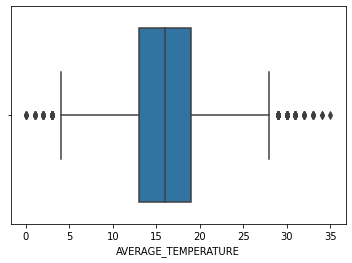

In [121]:
sns.boxplot(x=data['AVERAGE_TEMPERATURE'])

lower = data['AVERAGE_TEMPERATURE'].quantile(0.02)
upper = data['AVERAGE_TEMPERATURE'].quantile(0.98)


data['AVERAGE_TEMPERATURE'] = np.where(data['AVERAGE_TEMPERATURE'] <lower, lower,data['AVERAGE_TEMPERATURE'])
data['AVERAGE_TEMPERATURE'] = np.where(data['AVERAGE_TEMPERATURE'] >upper, upper,data['AVERAGE_TEMPERATURE'])

**AVERAGE_FREE_FLOW_SPEED**

In [122]:
#sns.boxplot(x=data['AVERAGE_FREE_FLOW_SPEED'])
lower = data['AVERAGE_FREE_FLOW_SPEED'].quantile(0.01)
upper = data['AVERAGE_FREE_FLOW_SPEED'].quantile(0.99)


data['AVERAGE_FREE_FLOW_SPEED'] = np.where(data['AVERAGE_FREE_FLOW_SPEED'] <lower, lower,data['AVERAGE_FREE_FLOW_SPEED'])
data['AVERAGE_FREE_FLOW_SPEED'] = np.where(data['AVERAGE_FREE_FLOW_SPEED'] >upper, upper,data['AVERAGE_FREE_FLOW_SPEED'])

**AVERAGE_TIME_DIFF**

In [123]:
'''sns.boxplot(x=data['AVERAGE_TIME_DIFF'])

lower = data['AVERAGE_TIME_DIFF'].quantile(0.03)
upper = data['AVERAGE_TIME_DIFF'].quantile(0.997)


data['AVERAGE_TIME_DIFF'] = np.where(data['AVERAGE_TIME_DIFF'] <lower, lower,data['AVERAGE_TIME_DIFF'])
data['AVERAGE_TIME_DIFF'] = np.where(data['AVERAGE_TIME_DIFF'] >upper, upper,data['AVERAGE_TIME_DIFF'])'''

"sns.boxplot(x=data['AVERAGE_TIME_DIFF'])\n\nlower = data['AVERAGE_TIME_DIFF'].quantile(0.03)\nupper = data['AVERAGE_TIME_DIFF'].quantile(0.997)\n\n\ndata['AVERAGE_TIME_DIFF'] = np.where(data['AVERAGE_TIME_DIFF'] <lower, lower,data['AVERAGE_TIME_DIFF'])\ndata['AVERAGE_TIME_DIFF'] = np.where(data['AVERAGE_TIME_DIFF'] >upper, upper,data['AVERAGE_TIME_DIFF'])"

**AVERAGE_FREE_FLOW_TIME**

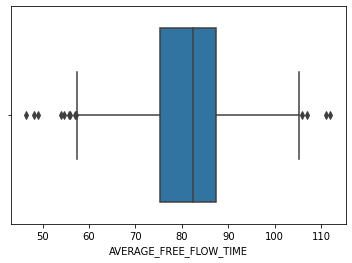

In [124]:
sns.boxplot(x=data['AVERAGE_FREE_FLOW_TIME'])

lower = data['AVERAGE_FREE_FLOW_TIME'].quantile(0.01)
upper = data['AVERAGE_FREE_FLOW_TIME'].quantile(0.99)


data['AVERAGE_FREE_FLOW_TIME'] = np.where(data['AVERAGE_FREE_FLOW_TIME'] <lower, lower,data['AVERAGE_FREE_FLOW_TIME'])
data['AVERAGE_FREE_FLOW_TIME'] = np.where(data['AVERAGE_FREE_FLOW_TIME'] >upper, upper,data['AVERAGE_FREE_FLOW_TIME'])

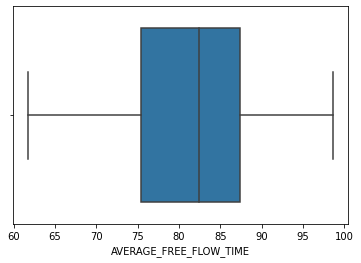

In [125]:
sns.boxplot(x=data['AVERAGE_FREE_FLOW_TIME'])

In [205]:
data

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,Year,Month,Day,Hour,Week_day,is_weekend,Season,work_hour,is_holiday
0,2,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,3,2019,8,29,7,4,0,3,2,0
1,3,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,3,2018,8,10,14,5,0,3,3,0
2,3,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,3,2019,9,1,16,7,1,4,4,0
3,3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,3,2019,2,26,11,2,0,1,2,0
4,2,41.6,50.4,77.0,2,15.0,1008.0,82.0,8.0,3,2019,6,6,12,4,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1,41.2,3.7,86.9,2,9.0,1030.0,71.0,4.0,3,2019,2,23,9,6,1,1,2,0
6808,2,38.9,51.9,76.9,2,17.0,1020.0,63.0,6.0,3,2019,6,8,18,6,1,3,4,0
6809,0,39.6,0.0,89.1,0,15.0,1020.0,42.0,4.0,3,2018,10,2,4,2,0,4,5,0
6810,0,41.6,0.0,85.5,0,8.0,1018.0,81.0,1.0,2,2019,1,30,1,3,0,1,5,0


# Visualização

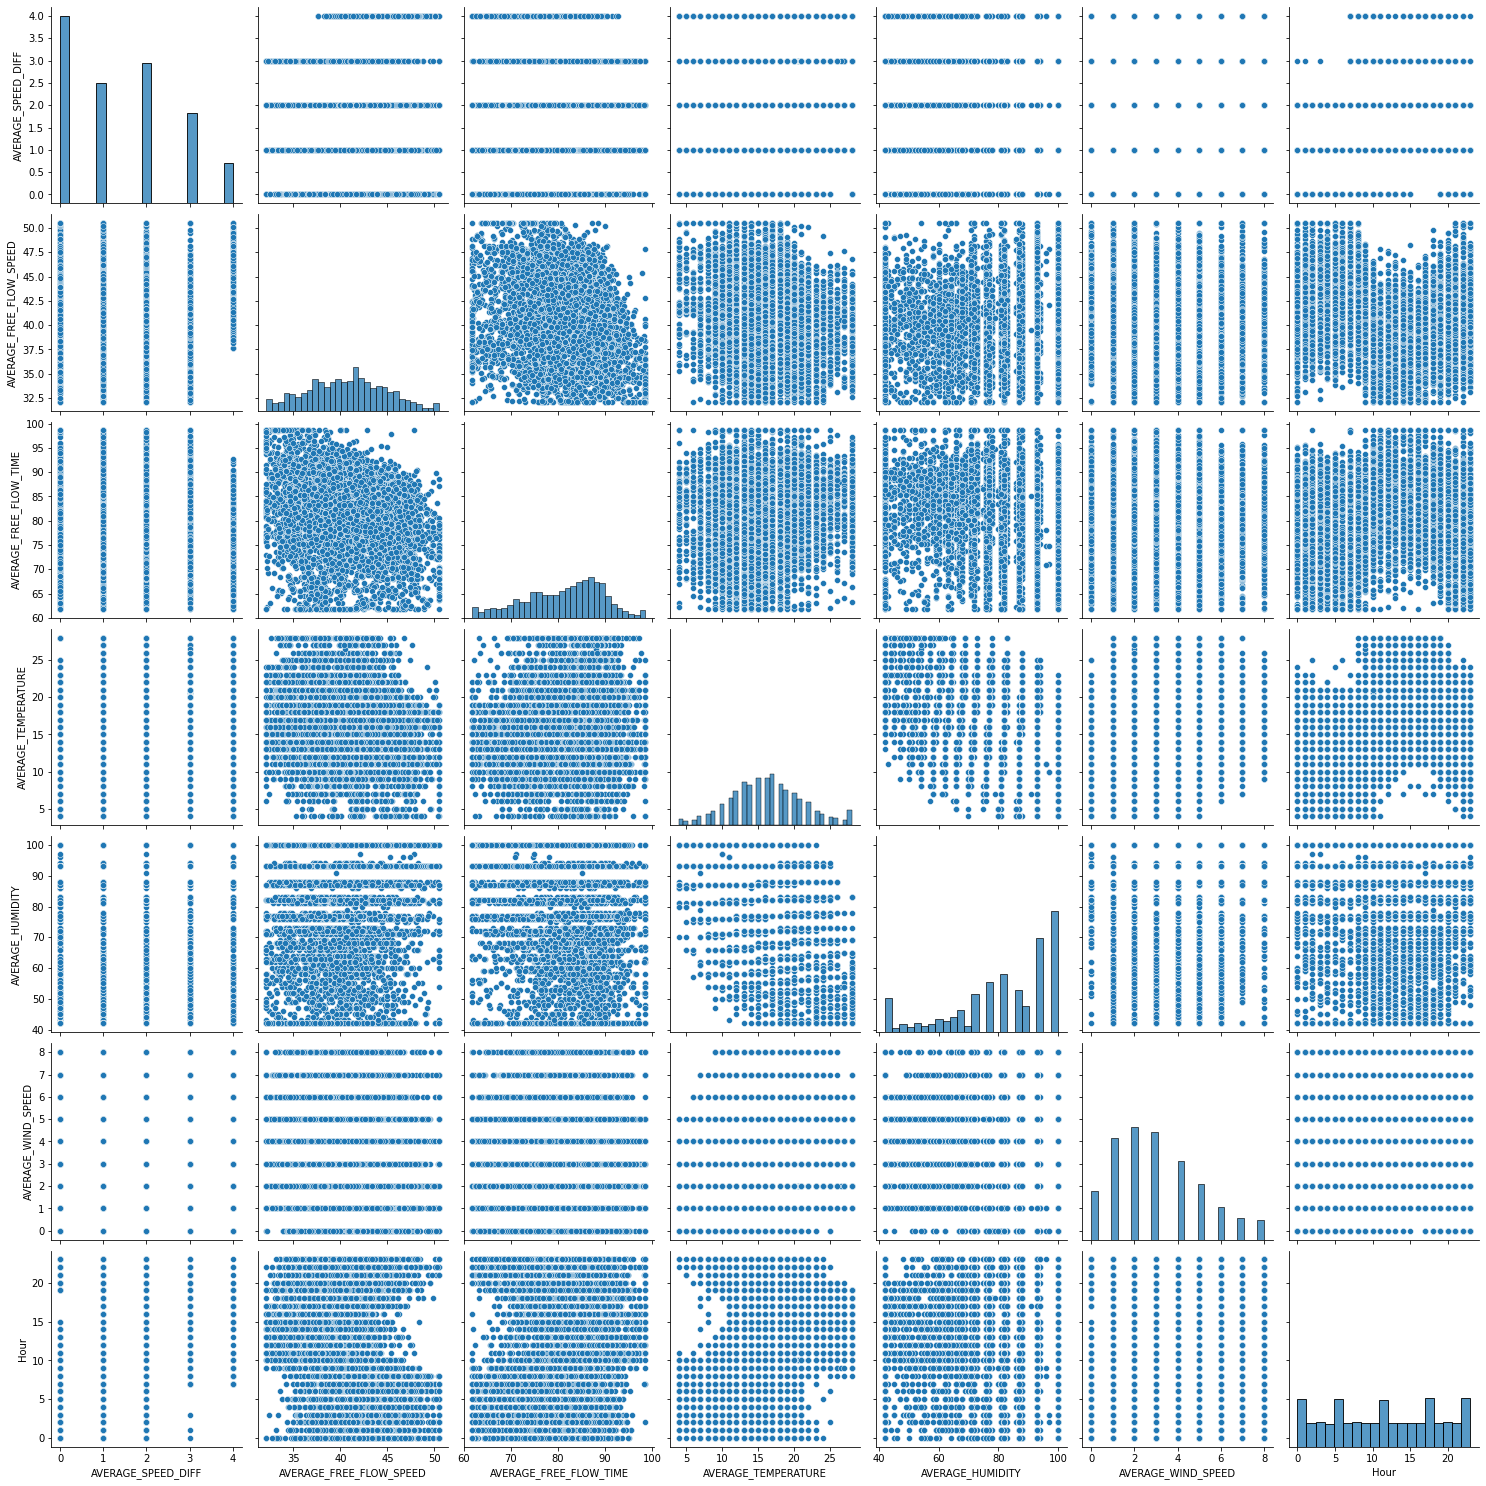

In [206]:
cols = ['AVERAGE_SPEED_DIFF', 'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_FREE_FLOW_TIME', 'AVERAGE_TEMPERATURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED', 'Hour']
sns.pairplot(data[cols], height=3)

### Matriz de Correlação

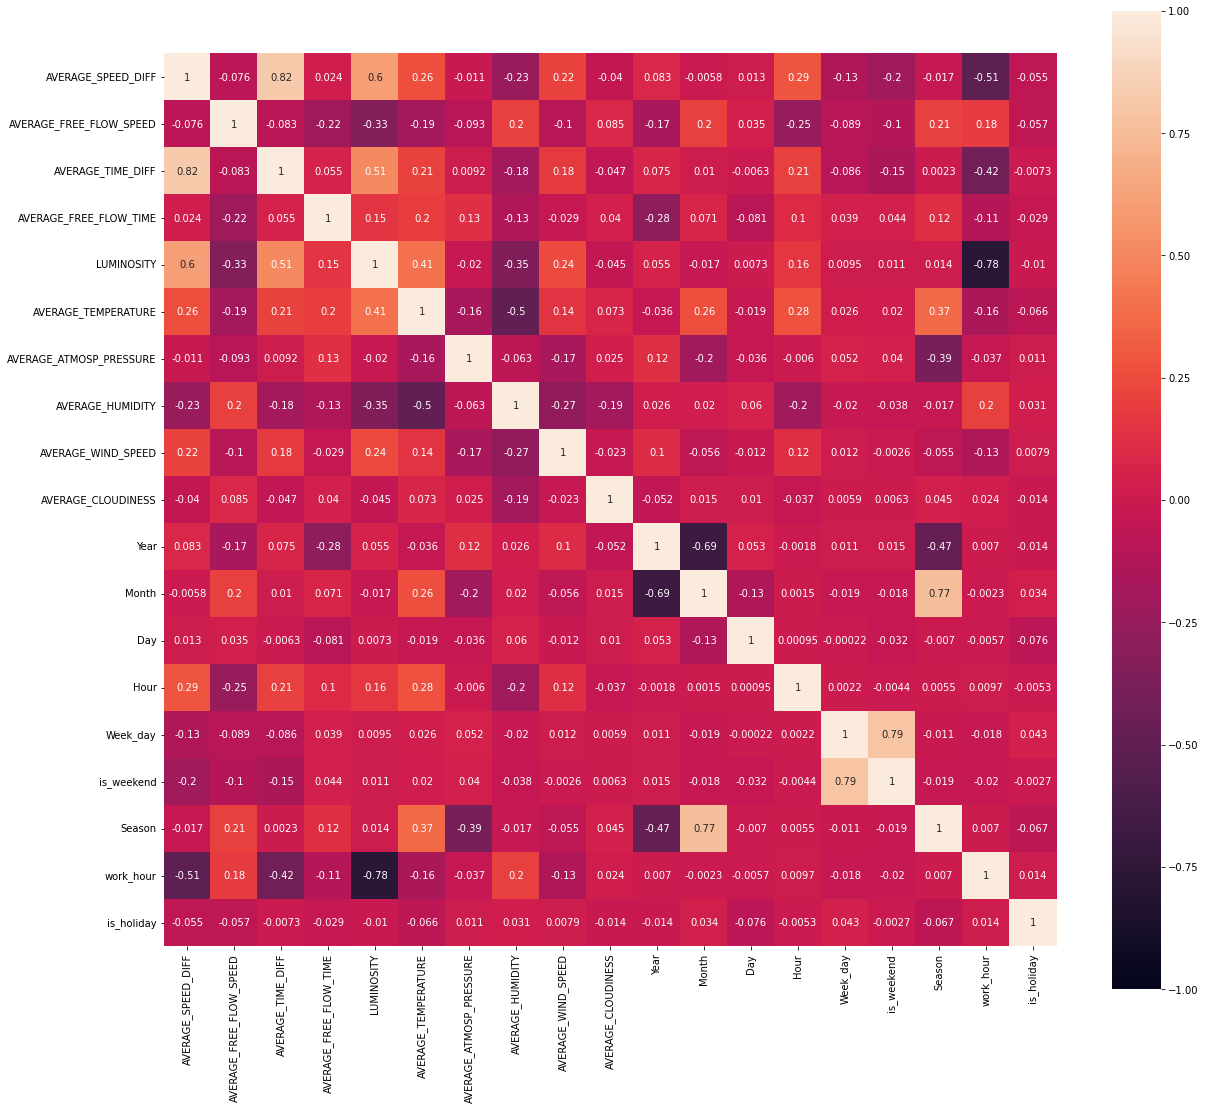

In [207]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

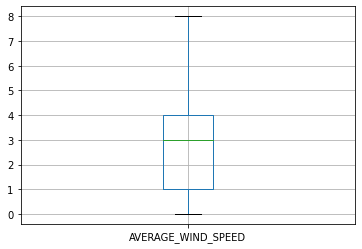

In [208]:
data.boxplot('AVERAGE_WIND_SPEED')

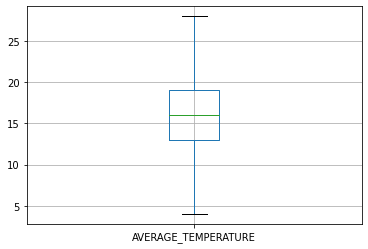

In [209]:
data.boxplot('AVERAGE_TEMPERATURE')

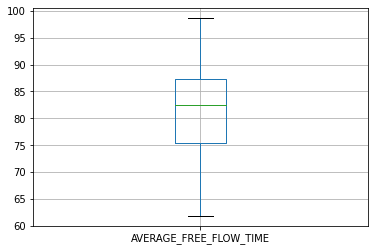

In [210]:
data.boxplot('AVERAGE_FREE_FLOW_TIME')

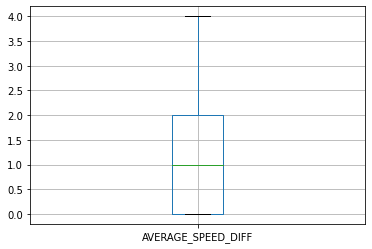

In [211]:
data.boxplot('AVERAGE_SPEED_DIFF')

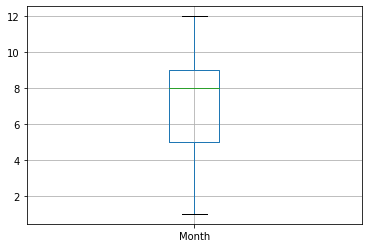

In [212]:
data.boxplot('Month')

In [213]:
data.std(axis=0)

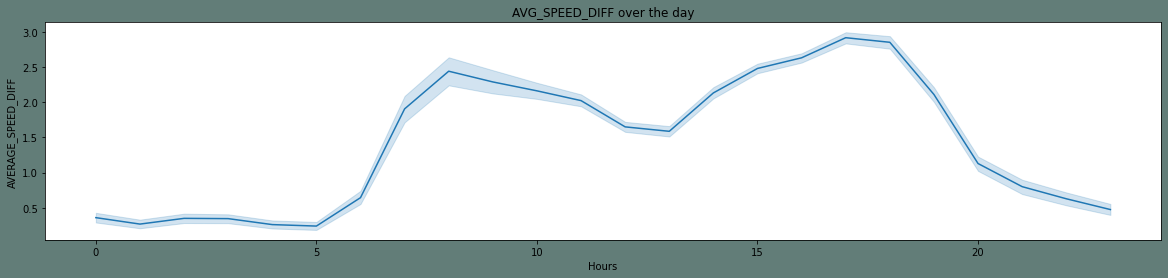

In [214]:
df = data.copy()

colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=df['Hour'],y="AVERAGE_SPEED_DIFF",data=df, palette=colors)
Time_series.set_title("AVG_SPEED_DIFF over the day")
Time_series.set_ylabel("AVERAGE_SPEED_DIFF")
Time_series.set_xlabel("Hours")

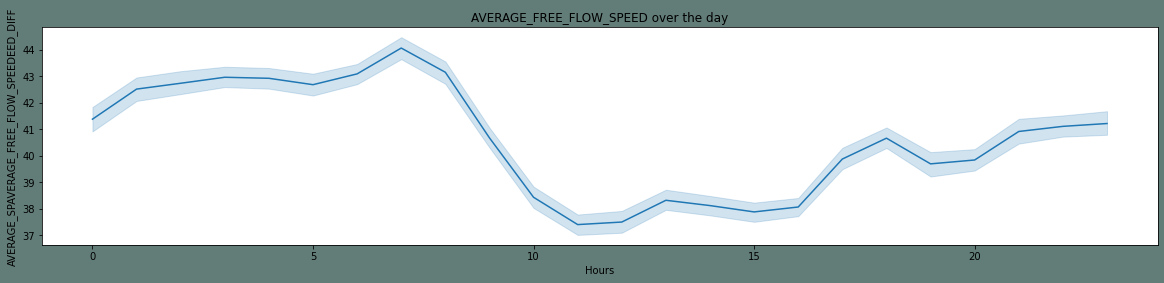

In [215]:
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=df['Hour'],y="AVERAGE_FREE_FLOW_SPEED",data=df, palette=colors)
Time_series.set_title("AVERAGE_FREE_FLOW_SPEED over the day")
Time_series.set_ylabel("AVERAGE_SPAVERAGE_FREE_FLOW_SPEEDEED_DIFF")
Time_series.set_xlabel("Hours")

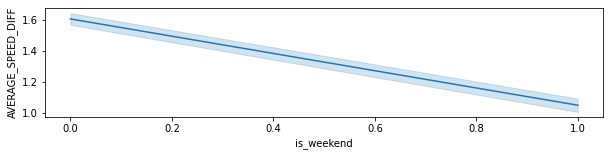

In [216]:
new_features = [ "Year", "Week_day", "Hour", "Day", "is_weekend"]

for i in new_features:
    plt.figure(figsize=(10,2))
    ax=sns.lineplot(x=data[i],y="AVERAGE_SPEED_DIFF",data=data)

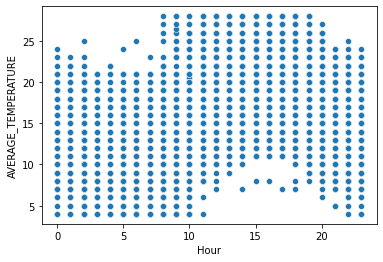

In [217]:

sns.scatterplot(data=data, x="Hour", y="AVERAGE_TEMPERATURE")
# sns.lineplot(x='Hour', y=data['AVERAGE_TEMPERATURE'], data=data )

In [218]:
# sns.lineplot(x='Hour', y=data['AVERAGE_TEMPERATURE'], data=data )

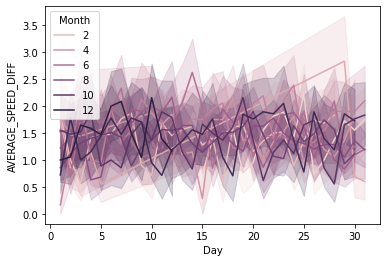

In [219]:
sns.lineplot(x="Day",y="AVERAGE_SPEED_DIFF",data=data, hue="Month")

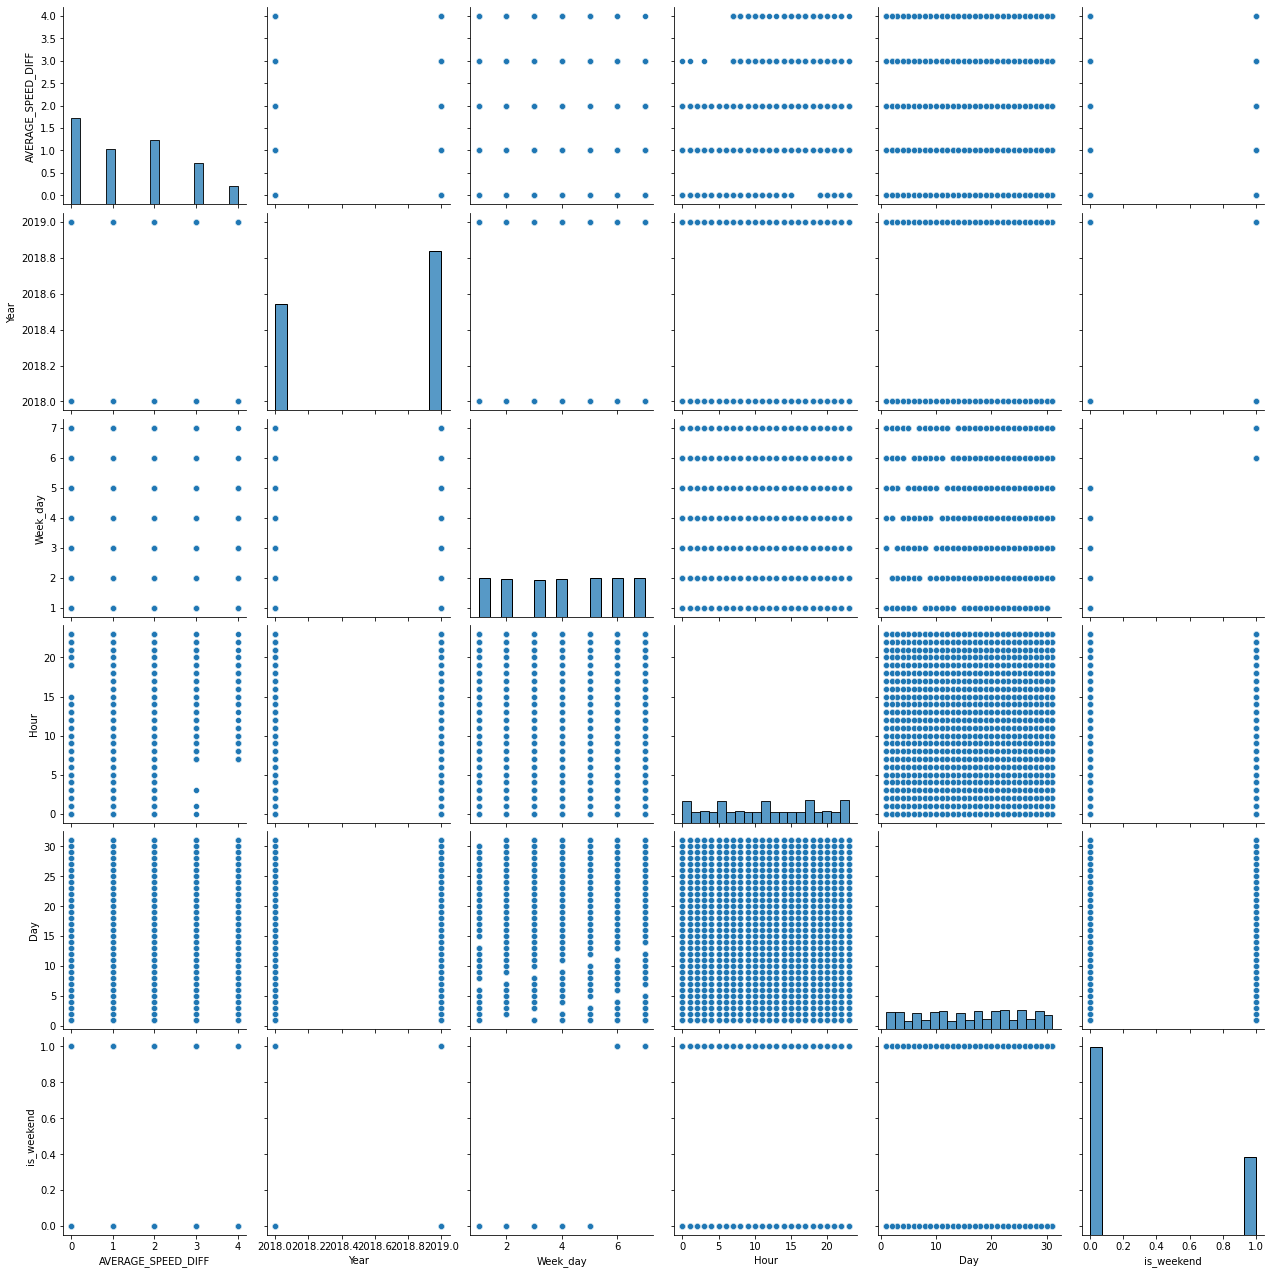

In [220]:
cols = ['AVERAGE_SPEED_DIFF','Year', 'Week_day', 'Hour', 'Day', 'is_weekend']
sns.pairplot(data[cols], height=3)

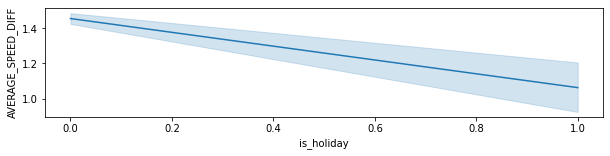

In [221]:
plt.figure(figsize=(10,2))
ax=sns.lineplot(x=data["is_holiday"],y="AVERAGE_SPEED_DIFF",data=data)

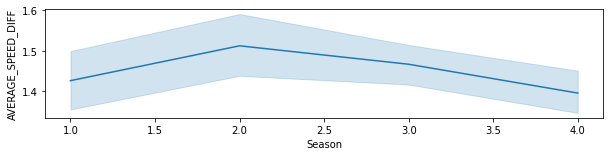

In [222]:
plt.figure(figsize=(10,2))
ax=sns.lineplot(x=data["Season"],y="AVERAGE_SPEED_DIFF",data=data)

# Random Forest Trees

# Classificação através de _Random Forest Trees_

## Criar partições de dados de teste e de treino

In [223]:

data.drop(['is_holiday','Year','Season'],axis = 1,inplace = True)
test.drop(['is_holiday','Year','Season'],axis = 1,inplace = True)




X = data.drop('AVERAGE_SPEED_DIFF',axis=1)
y = data['AVERAGE_SPEED_DIFF']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2021)

In [224]:

#mms = MinMaxScaler()
#X_train = mms.fit_transform(X_train)
#X_test = mms.transform(X_test)

In [225]:
#data.drop('Year', axis=1, inplace=True)
#data.drop('Day', axis=1, inplace=True)

## Treinar modelo

**Decision Tree**

In [226]:
clf = DecisionTreeClassifier(max_depth=6,random_state=2021)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=2021)

**Random Forest**

In [227]:


rfc=RandomForestClassifier(n_estimators = 265, n_jobs = 2,random_state=2021)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=265, n_jobs=2, random_state=2021)

## Realizar previsão

**Decision Tree**

In [228]:
pred_dtc = clf.predict(X_test)

**Random Forest**

In [229]:

pred_rfc = rfc.predict(X_test)

## Análise de resultados

**Decision Tree**

In [230]:
accuracy_score(y_test,pred_dtc)

0.776962582538518

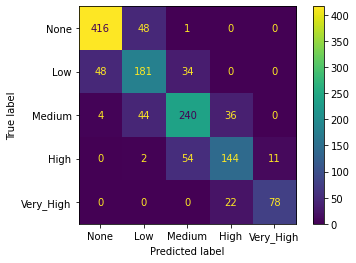

In [231]:
cm = confusion_matrix(y_test, pred_dtc)
cmd = ConfusionMatrixDisplay(cm, display_labels=['None', 'Low', 'Medium', 'High', 'Very_High'])
cmd.plot()

In [232]:
'''print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, pred_dtc))
print('\n')'''

print("=== Classification Report ===")
print(classification_report(y_test, pred_dtc))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       465
           1       0.66      0.69      0.67       263
           2       0.73      0.74      0.74       324
           3       0.71      0.68      0.70       211
           4       0.88      0.78      0.83       100

    accuracy                           0.78      1363
   macro avg       0.77      0.76      0.76      1363
weighted avg       0.78      0.78      0.78      1363



**Random Forest**

In [233]:
accuracy_score(y_test,pred_rfc)

0.7938371239911959

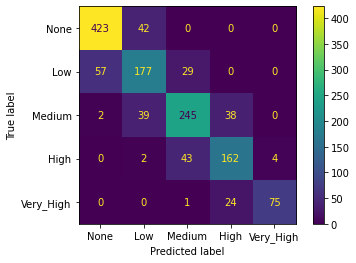

In [234]:
cm = confusion_matrix(y_test, pred_rfc)
cmd = ConfusionMatrixDisplay(cm, display_labels=['None', 'Low', 'Medium', 'High', 'Very_High'])
cmd.plot()

In [235]:
'''print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, pred_rfc))
print('\n')'''

print("=== Classification Report ===")
print(classification_report(y_test, pred_rfc))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       465
           1       0.68      0.67      0.68       263
           2       0.77      0.76      0.76       324
           3       0.72      0.77      0.74       211
           4       0.95      0.75      0.84       100

    accuracy                           0.79      1363
   macro avg       0.80      0.77      0.78      1363
weighted avg       0.80      0.79      0.79      1363



In [236]:
data

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,Month,Day,Hour,Week_day,is_weekend,work_hour
0,2,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,3,8,29,7,4,0,2
1,3,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,3,8,10,14,5,0,3
2,3,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,3,9,1,16,7,1,4
3,3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,3,2,26,11,2,0,2
4,2,41.6,50.4,77.0,2,15.0,1008.0,82.0,8.0,3,6,6,12,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1,41.2,3.7,86.9,2,9.0,1030.0,71.0,4.0,3,2,23,9,6,1,2
6808,2,38.9,51.9,76.9,2,17.0,1020.0,63.0,6.0,3,6,8,18,6,1,4
6809,0,39.6,0.0,89.1,0,15.0,1020.0,42.0,4.0,3,10,2,4,2,0,5
6810,0,41.6,0.0,85.5,0,8.0,1018.0,81.0,1.0,2,1,30,1,3,0,5


In [237]:
test

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,Month,Day,Hour,Week_day,is_weekend
0,39.2,0.0,91.0,0,8.0,1026.0,71.0,1.0,3,2,13,23,3,0
1,42.5,12.2,76.8,0,11.0,1020.0,93.0,4.0,2,11,28,20,3,0
2,45.9,0.0,86.3,0,14.0,1017.0,93.0,0.0,3,8,14,5,2,0
3,33.2,51.7,89.9,2,22.0,1016.0,77.0,4.0,2,7,6,17,6,1
4,44.0,3.5,85.5,0,12.0,1004.0,100.0,9.0,3,10,15,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,50.2,1.1,80.5,0,11.0,1013.0,100.0,5.0,3,11,24,5,6,1
1496,38.0,4.6,85.6,0,9.0,1028.0,100.0,0.0,3,3,1,2,5,0
1497,43.8,0.0,80.4,0,16.0,1013.0,100.0,1.0,3,9,5,1,3,0
1498,46.0,83.2,83.2,2,10.0,1004.0,87.0,5.0,3,11,5,8,1,0


**GridSearchCV**

In [238]:
# Definição do modelo a usar para otimizar parametros
model = RandomForestClassifier(random_state=2021)
cv_inner = StratifiedKFold(n_splits = 3, shuffle=True,random_state=2021)

In [239]:
# Dicionário com os parametros e possiveis valores a testar
space = dict()
space['n_estimators'] = [205,220,265,267,270]
space['max_features'] = [2,3,4,5,6,7,8]

In [240]:
search = GridSearchCV(model,space,scoring='accuracy',n_jobs=2, cv=cv_inner, refit=True)

In [241]:
result = search.fit(X_train, y_train)

In [242]:
# Aqui obtem-se o melhor modelo que o GridSearchCV encontrou
best_model = result.best_estimator_
best_model

RandomForestClassifier(max_features=7, n_estimators=205, random_state=2021)

**Teste do modelo obtido**

In [243]:
yhat = best_model.predict(X_test)

In [244]:
accuracy_score(y_test, yhat)

0.7997065297138665

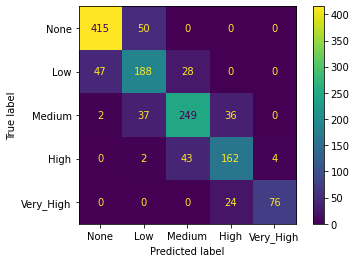

In [245]:
cm = confusion_matrix(y_test, yhat)
cmd = ConfusionMatrixDisplay(cm, display_labels=['None', 'Low', 'Medium', 'High', 'Very_High'])
cmd.plot()

In [246]:
'''print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, yhat))
print('\n')'''
print("=== Classification Report ===")
print(classification_report(y_test, yhat))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       465
           1       0.68      0.71      0.70       263
           2       0.78      0.77      0.77       324
           3       0.73      0.77      0.75       211
           4       0.95      0.76      0.84       100

    accuracy                           0.80      1363
   macro avg       0.81      0.78      0.79      1363
weighted avg       0.80      0.80      0.80      1363



**Previsão com o modelo Random Forest para submeter no Kaggle**

In [247]:
test_pred = rfc.predict(test)
test_pred

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- work_hour

  warnings.warn(message, FutureWarning)


ValueError: ValueError: X has 14 features, but RandomForestClassifier is expecting 15 features as input.

In [878]:
res = pd.DataFrame()
res['RowId'] = range(1, len(test_pred) + 1)
res['Speed_Diff'] = test_pred

mapper2 = {0 : 'None', 1 :'Low', 2 : 'Medium', 3: 'High', 4 : 'Very_High'}
res['Speed_Diff'] = res['Speed_Diff'].replace(mapper2)
res.to_csv('submission.csv', index=False)

## Feature ranking
Vamos ver quais são os atributos que mais influenciam o modelo 

In [108]:
feat_list = list(X.columns)
feat_ranked = pd.Series(rfc.feature_importances_, index=feat_list).sort_values()
print(feat_ranked)

NameError: NameError: name 'rfc' is not defined

# Visualização adicional

In [880]:
data = pd.read_csv('novo_training_data.csv')
data.drop('record_date', axis=1, inplace=True)
data

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6807,Low,41.2,3.7,86.9,LIGHT,9.0,1030.0,71.0,4.0,céu claro,0.0,NaN
6808,Medium,38.9,51.9,76.9,LIGHT,17.0,1020.0,63.0,6.0,NaN,0.0,NaN
6809,None,39.6,0.0,89.1,DARK,15.0,1020.0,39.0,4.0,céu claro,0.0,NaN
6810,None,41.6,0.0,85.5,DARK,8.0,1018.0,81.0,1.0,algumas nuvens,0.0,NaN


## Average speed diff

In [881]:
data.AVERAGE_SPEED_DIFF.value_counts()

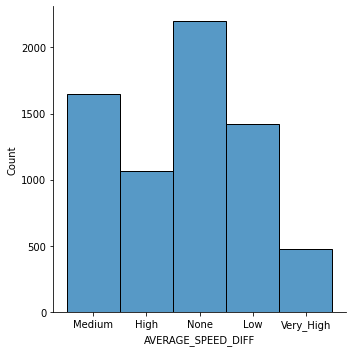

In [882]:
sns.displot(data, x=data.AVERAGE_SPEED_DIFF)

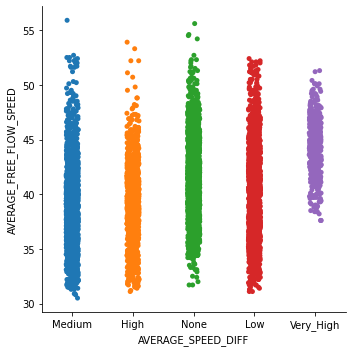

In [883]:
sns.catplot(x='AVERAGE_SPEED_DIFF', y="AVERAGE_FREE_FLOW_SPEED", data=data)

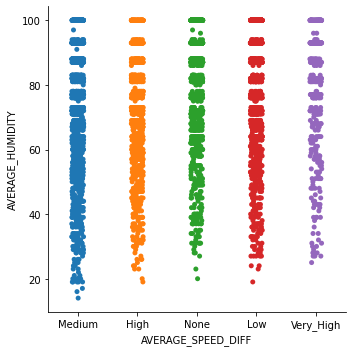

In [884]:
sns.catplot(x='AVERAGE_SPEED_DIFF', y="AVERAGE_HUMIDITY", data=data)

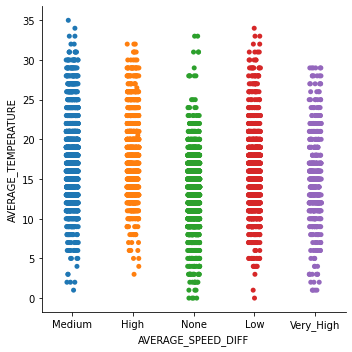

In [885]:
sns.catplot(x='AVERAGE_SPEED_DIFF', y="AVERAGE_TEMPERATURE", data=data)

## Average free flow speed

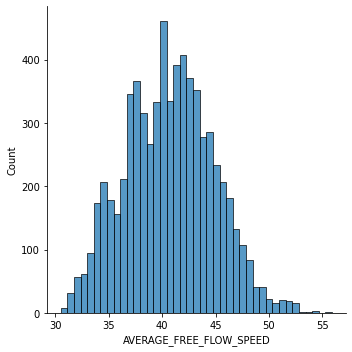

In [886]:
sns.displot(data, x=data.AVERAGE_FREE_FLOW_SPEED)

In [887]:
sns.boxplot(x='AVERAGE_FREE_FLOW_SPEED', data=data, orient='h')

<AxesSubplot:xlabel='AVERAGE_FREE_FLOW_SPEED'>

## Average time diff

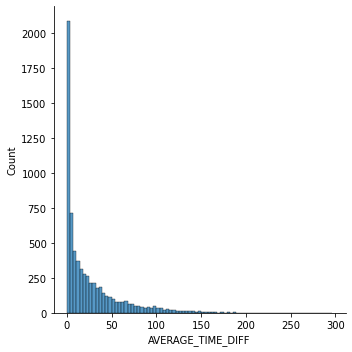

In [888]:
sns.displot(data, x=data.AVERAGE_TIME_DIFF)

In [889]:
sns.boxplot(x='AVERAGE_TIME_DIFF', data=data)

<AxesSubplot:xlabel='AVERAGE_TIME_DIFF'>

In [890]:
data.AVERAGE_TIME_DIFF.isna().any()

False

## Average free flow time

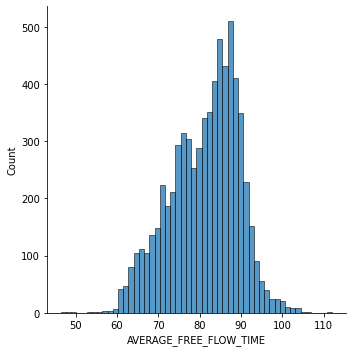

In [891]:
sns.displot(data, x=data.AVERAGE_FREE_FLOW_TIME)

In [892]:
print(data.AVERAGE_FREE_FLOW_TIME.isna().any())
print(data.AVERAGE_FREE_FLOW_TIME.isnull().any())

False
False


## Luminosity

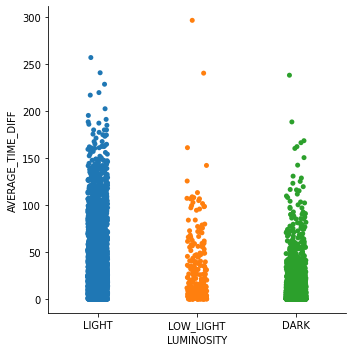

In [893]:
sns.catplot(x='LUMINOSITY', y='AVERAGE_TIME_DIFF', data=data)

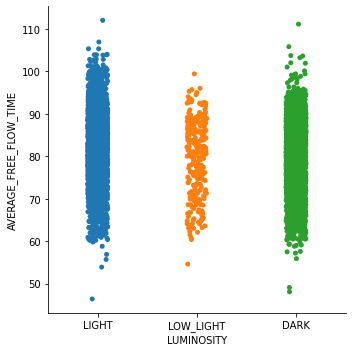

In [894]:
sns.catplot(x='LUMINOSITY', y='AVERAGE_FREE_FLOW_TIME', data=data)

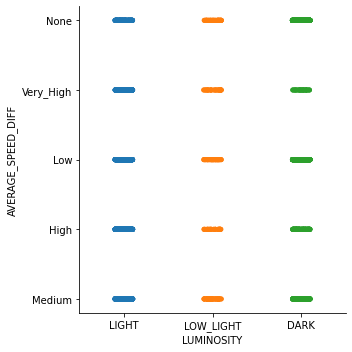

In [895]:
sns.catplot(x='LUMINOSITY', y='AVERAGE_SPEED_DIFF', data=data)

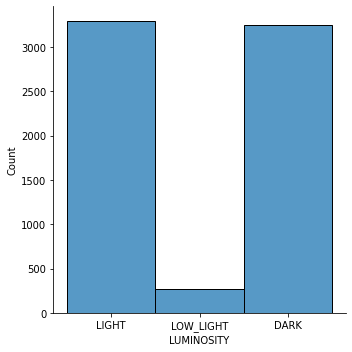

In [896]:
sns.displot(data, x=data.LUMINOSITY)

## Average temperature

In [897]:
print(data.AVERAGE_TEMPERATURE.isna().any())
print(data.AVERAGE_TEMPERATURE.isnull().any())

False
False


In [898]:
data.AVERAGE_TEMPERATURE.describe()

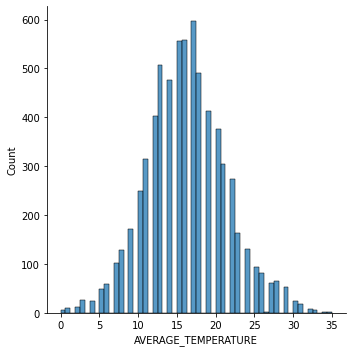

In [899]:
sns.displot(data, x=data.AVERAGE_TEMPERATURE)

## Average Atmosp. Pressure

In [900]:
print(data.AVERAGE_ATMOSP_PRESSURE.isna().any())
print(data.AVERAGE_ATMOSP_PRESSURE.isnull().any())

False
False


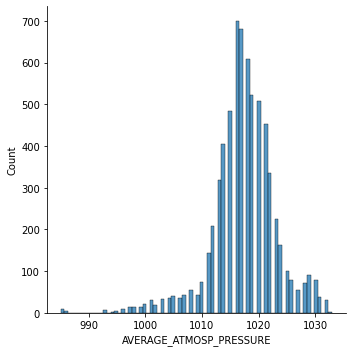

In [901]:
sns.displot(data, x=data.AVERAGE_ATMOSP_PRESSURE)

In [902]:
sns.boxplot(x='AVERAGE_ATMOSP_PRESSURE', data=data)

<AxesSubplot:xlabel='AVERAGE_ATMOSP_PRESSURE'>

## Average Wind Speed

In [903]:
print(data.AVERAGE_WIND_SPEED.isna().any())
print(data.AVERAGE_WIND_SPEED.isnull().any())

False
False


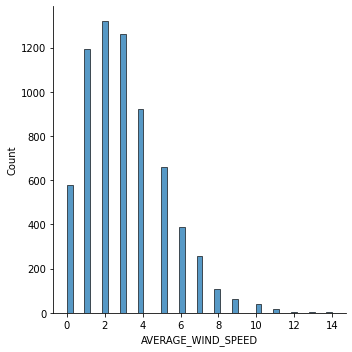

In [904]:
sns.displot(data, x=data.AVERAGE_WIND_SPEED)

In [905]:
sns.boxplot(x='AVERAGE_WIND_SPEED', data=data)

<AxesSubplot:xlabel='AVERAGE_WIND_SPEED'>

## Average Cloudiness

In [906]:
print(data.AVERAGE_CLOUDINESS.isna().any())
print(data.AVERAGE_CLOUDINESS.isnull().any())
data.AVERAGE_CLOUDINESS.value_counts()

True
True


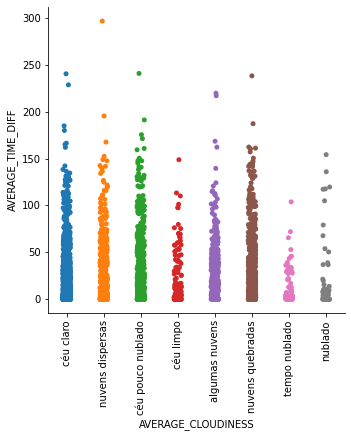

In [907]:
g = sns.catplot(x='AVERAGE_CLOUDINESS', y="AVERAGE_TIME_DIFF", data=data)
g.set_xticklabels(rotation=90)

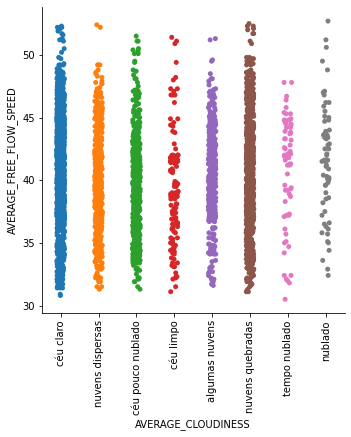

In [908]:
g = sns.catplot(x='AVERAGE_CLOUDINESS', y="AVERAGE_FREE_FLOW_SPEED", data=data)
g.set_xticklabels(rotation=90)

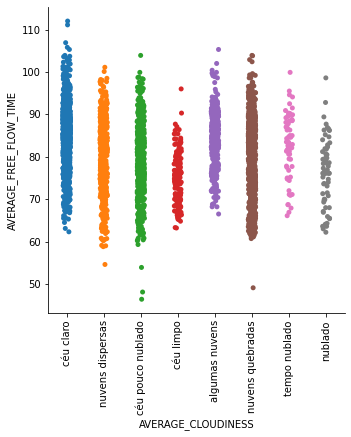

In [909]:
g = sns.catplot(x='AVERAGE_CLOUDINESS', y="AVERAGE_FREE_FLOW_TIME", data=data)
g.set_xticklabels(rotation=90)

## Average Rain

In [910]:
print(data.AVERAGE_RAIN.isna().any())
print(data.AVERAGE_RAIN.isnull().any())
data.AVERAGE_RAIN.value_counts()

True
True


# Classificação com Redes Neuronais

In [911]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical 


In [912]:
data = pd.read_csv('novo_training_data.csv')
data

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2019-02-23 09:00:00,Low,41.2,3.7,86.9,LIGHT,9.0,1030.0,71.0,4.0,céu claro,0.0,NaN
6808,2019-06-08 18:00:00,Medium,38.9,51.9,76.9,LIGHT,17.0,1020.0,63.0,6.0,NaN,0.0,NaN
6809,2018-10-02 04:00:00,None,39.6,0.0,89.1,DARK,15.0,1020.0,39.0,4.0,céu claro,0.0,NaN
6810,2019-01-30 01:00:00,None,41.6,0.0,85.5,DARK,8.0,1018.0,81.0,1.0,algumas nuvens,0.0,NaN


## Tratar Dados

In [913]:
# Obter dias da semana a partir da colunoa 'record_date'
data.record_date = pd.to_datetime(data.record_date)


data['WEEK_DAY'] = data.record_date.dt.strftime("%A")
week_day_mapper = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3 , 'Thursday' : 4 ,'Friday': 5 , 'Saturday' : 6 , 'Sunday' : 7}
data['WEEK_DAY'] = data["WEEK_DAY"].replace(week_day_mapper)

data['HOUR'] = data.record_date.dt.hour


data.drop('record_date', axis=1, inplace=True)
data

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,WEEK_DAY,HOUR
0,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN,4,7
1,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN,5,14
2,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN,7,16
3,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN,2,11
4,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,Low,41.2,3.7,86.9,LIGHT,9.0,1030.0,71.0,4.0,céu claro,0.0,NaN,6,9
6808,Medium,38.9,51.9,76.9,LIGHT,17.0,1020.0,63.0,6.0,NaN,0.0,NaN,6,18
6809,None,39.6,0.0,89.1,DARK,15.0,1020.0,39.0,4.0,céu claro,0.0,NaN,2,4
6810,None,41.6,0.0,85.5,DARK,8.0,1018.0,81.0,1.0,algumas nuvens,0.0,NaN,3,1


In [914]:
# Remover alguns atributos
data.drop(['AVERAGE_HUMIDITY', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_PRECIPITATION', 'AVERAGE_CLOUDINESS'], axis=1, inplace=True)
data

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_WIND_SPEED,AVERAGE_RAIN,WEEK_DAY,HOUR
0,Medium,41.5,11.5,71.4,LIGHT,15.0,3.0,NaN,4,7
1,High,41.7,48.3,87.4,LIGHT,21.0,5.0,NaN,5,14
2,High,38.6,38.4,85.2,LIGHT,26.0,4.0,NaN,7,16
3,High,37.4,61.0,94.1,LIGHT,18.0,4.0,NaN,2,11
4,Medium,41.6,50.4,77.0,LIGHT,15.0,10.0,NaN,4,12
...,...,...,...,...,...,...,...,...,...,...
6807,Low,41.2,3.7,86.9,LIGHT,9.0,4.0,NaN,6,9
6808,Medium,38.9,51.9,76.9,LIGHT,17.0,6.0,NaN,6,18
6809,None,39.6,0.0,89.1,DARK,15.0,4.0,NaN,2,4
6810,None,41.6,0.0,85.5,DARK,8.0,1.0,NaN,3,1


In [915]:
# Vamos usar apenas as entradas com valores para AVERAGE_RAIN
data = data[data['AVERAGE_RAIN'].notna()]
data

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_WIND_SPEED,AVERAGE_RAIN,WEEK_DAY,HOUR
10,Medium,42.5,14.1,75.1,DARK,18.0,1.0,chuva fraca,7,22
22,Medium,40.9,35.9,77.7,LIGHT,20.0,6.0,chuva fraca,1,16
24,Very_High,43.1,113.5,86.2,LIGHT,22.0,7.0,chuva fraca,4,18
52,Medium,45.6,10.2,77.3,DARK,9.0,10.0,chuva,5,22
55,None,44.2,2.6,77.6,DARK,12.0,2.0,chuva fraca,7,4
...,...,...,...,...,...,...,...,...,...,...
6747,Low,38.6,4.8,73.2,LIGHT,16.0,3.0,chuva fraca,7,10
6777,None,31.7,0.0,57.6,DARK,15.0,7.0,chuva fraca,2,22
6779,Low,38.7,11.4,79.9,DARK,14.0,3.0,chuva fraca,2,4
6799,High,41.0,51.5,80.5,LIGHT,10.0,3.0,chuva moderada,3,10


In [916]:
data.AVERAGE_RAIN.value_counts()

In [917]:
data = data[np.isin(data, ['chuva fraca','chuva moderada']).any(axis=1)]
data

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_WIND_SPEED,AVERAGE_RAIN,WEEK_DAY,HOUR
10,Medium,42.5,14.1,75.1,DARK,18.0,1.0,chuva fraca,7,22
22,Medium,40.9,35.9,77.7,LIGHT,20.0,6.0,chuva fraca,1,16
24,Very_High,43.1,113.5,86.2,LIGHT,22.0,7.0,chuva fraca,4,18
55,None,44.2,2.6,77.6,DARK,12.0,2.0,chuva fraca,7,4
110,None,39.2,4.2,71.7,DARK,14.0,6.0,chuva fraca,6,21
...,...,...,...,...,...,...,...,...,...,...
6747,Low,38.6,4.8,73.2,LIGHT,16.0,3.0,chuva fraca,7,10
6777,None,31.7,0.0,57.6,DARK,15.0,7.0,chuva fraca,2,22
6779,Low,38.7,11.4,79.9,DARK,14.0,3.0,chuva fraca,2,4
6799,High,41.0,51.5,80.5,LIGHT,10.0,3.0,chuva moderada,3,10


In [918]:
# converter valores categoricos

rain_mapper = {'chuva fraca': 0, 'chuva moderada': 1}
data['AVERAGE_RAIN'] = data["AVERAGE_RAIN"].replace(rain_mapper)

luminosity_mapper = {'DARK': 0, 'LOW_LIGHT': 1, 'LIGHT': 2}
data['LUMINOSITY'] = data["LUMINOSITY"].replace(luminosity_mapper)

avg_speed_diff_mapper = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High': 4}
data['AVERAGE_SPEED_DIFF'] = data["AVERAGE_SPEED_DIFF"].replace(avg_speed_diff_mapper)

data

<ipython-input-918-a0db65b18113>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AVERAGE_RAIN'] = data["AVERAGE_RAIN"].replace(rain_mapper)
<ipython-input-918-a0db65b18113>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LUMINOSITY'] = data["LUMINOSITY"].replace(luminosity_mapper)
<ipython-input-918-a0db65b18113>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_WIND_SPEED,AVERAGE_RAIN,WEEK_DAY,HOUR
10,2,42.5,14.1,75.1,0,18.0,1.0,0,7,22
22,2,40.9,35.9,77.7,2,20.0,6.0,0,1,16
24,4,43.1,113.5,86.2,2,22.0,7.0,0,4,18
55,0,44.2,2.6,77.6,0,12.0,2.0,0,7,4
110,0,39.2,4.2,71.7,0,14.0,6.0,0,6,21
...,...,...,...,...,...,...,...,...,...,...
6747,1,38.6,4.8,73.2,2,16.0,3.0,0,7,10
6777,0,31.7,0.0,57.6,0,15.0,7.0,0,2,22
6779,1,38.7,11.4,79.9,0,14.0,3.0,0,2,4
6799,3,41.0,51.5,80.5,2,10.0,3.0,1,3,10


In [919]:
# Remover outliers  de 'AVERAGE FREE FLOW SPEED'
#data = data.drop(data[data['AVERAGE_FREE_FLOW_SPEED'] > 50].index)
data

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_WIND_SPEED,AVERAGE_RAIN,WEEK_DAY,HOUR
10,2,42.5,14.1,75.1,0,18.0,1.0,0,7,22
22,2,40.9,35.9,77.7,2,20.0,6.0,0,1,16
24,4,43.1,113.5,86.2,2,22.0,7.0,0,4,18
55,0,44.2,2.6,77.6,0,12.0,2.0,0,7,4
110,0,39.2,4.2,71.7,0,14.0,6.0,0,6,21
...,...,...,...,...,...,...,...,...,...,...
6747,1,38.6,4.8,73.2,2,16.0,3.0,0,7,10
6777,0,31.7,0.0,57.6,0,15.0,7.0,0,2,22
6779,1,38.7,11.4,79.9,0,14.0,3.0,0,2,4
6799,3,41.0,51.5,80.5,2,10.0,3.0,1,3,10


## Treino

In [920]:
data = pd.concat([data, pd.get_dummies(data.AVERAGE_SPEED_DIFF)], axis=1)
data.drop('AVERAGE_SPEED_DIFF', axis=1, inplace=True)
data.describe(())
                 

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_WIND_SPEED,AVERAGE_RAIN,WEEK_DAY,HOUR,0,1,2,3,4
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,41.618116,25.855556,78.824638,0.917874,13.299517,4.760870,0.369565,3.896135,11.142512,0.297101,0.190821,0.263285,0.147343,0.101449
std,4.208332,36.431998,7.860279,0.975744,2.888928,2.814407,0.483271,2.026778,6.800974,0.457535,0.393424,0.440949,0.354876,0.302288
min,31.400000,0.000000,57.200000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.600000,10.100000,79.400000,0.000000,13.000000,4.000000,0.000000,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,55.900000,188.500000,104.000000,2.000000,22.000000,13.000000,1.000000,7.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [921]:
X = data[['AVERAGE_FREE_FLOW_SPEED','AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE', 'AVERAGE_WIND_SPEED', 'AVERAGE_RAIN', 'WEEK_DAY', 'HOUR']]
X

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_WIND_SPEED,AVERAGE_RAIN,WEEK_DAY,HOUR
10,42.5,14.1,75.1,0,18.0,1.0,0,7,22
22,40.9,35.9,77.7,2,20.0,6.0,0,1,16
24,43.1,113.5,86.2,2,22.0,7.0,0,4,18
55,44.2,2.6,77.6,0,12.0,2.0,0,7,4
110,39.2,4.2,71.7,0,14.0,6.0,0,6,21
...,...,...,...,...,...,...,...,...,...
6747,38.6,4.8,73.2,2,16.0,3.0,0,7,10
6777,31.7,0.0,57.6,0,15.0,7.0,0,2,22
6779,38.7,11.4,79.9,0,14.0,3.0,0,2,4
6799,41.0,51.5,80.5,2,10.0,3.0,1,3,10


In [922]:
y = data.drop(['HOUR', 'WEEK_DAY', 'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE', 'AVERAGE_WIND_SPEED', 'AVERAGE_RAIN'], axis=1)
y

,0,1,2,3,4
10,0,0,1,0,0
22,0,0,1,0,0
24,0,0,0,0,1
55,1,0,0,0,0
110,1,0,0,0,0
...,...,...,...,...,...
6747,0,1,0,0,0
6777,1,0,0,0,0
6779,0,1,0,0,0
6799,0,0,0,1,0


In [923]:



scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)

'''
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)
'''
X_scaled

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_WIND_SPEED,AVERAGE_RAIN,WEEK_DAY,HOUR
0,0.453061,0.074801,0.382479,0.0,0.7500,0.076923,0.0,1.000000,0.956522
1,0.387755,0.190451,0.438034,1.0,0.8750,0.461538,0.0,0.000000,0.695652
2,0.477551,0.602122,0.619658,1.0,1.0000,0.538462,0.0,0.500000,0.782609
3,0.522449,0.013793,0.435897,0.0,0.3750,0.153846,0.0,1.000000,0.173913
4,0.318367,0.022281,0.309829,0.0,0.5000,0.461538,0.0,0.833333,0.913043
...,...,...,...,...,...,...,...,...,...
409,0.293878,0.025464,0.341880,1.0,0.6250,0.230769,0.0,1.000000,0.434783
410,0.012245,0.000000,0.008547,0.0,0.5625,0.538462,0.0,0.166667,0.956522
411,0.297959,0.060477,0.485043,0.0,0.5000,0.230769,0.0,0.166667,0.173913
412,0.391837,0.273210,0.497863,1.0,0.2500,0.230769,1.0,0.333333,0.434783


In [924]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=40)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(289, 9)
(125, 9)
(289, 5)
(125, 5)


In [925]:
y_train

,0,1,2,3,4
6183,1,0,0,0,0
1690,1,0,0,0,0
6459,1,0,0,0,0
2205,0,0,1,0,0
973,0,0,0,0,1
...,...,...,...,...,...
5246,0,0,0,1,0
2855,0,0,0,1,0
184,1,0,0,0,0
3711,1,0,0,0,0


In [926]:

model = Sequential()
model.add(Dense(500, activation='relu', input_dim=9))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [927]:
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
19/19 [==============================] - 0s 2ms/step - loss: 1.5236 - accuracy: 0.2907
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 1.3368 - accuracy: 0.4325
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 1.1944 - accuracy: 0.4775
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 1.1035 - accuracy: 0.5294
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 1.0442 - accuracy: 0.5121
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.9257 - accuracy: 0.5848
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.8867 - accuracy: 0.6021
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.8464 - accuracy: 0.5986
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.7680 - accuracy: 0.6886
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.8034 - accuracy: 0.6713
Epoch 11/

In [928]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    
pred_test

Accuracy on training data: 0.7889273166656494 
 Error on training data: 0.21107268333435059
Accuracy on test data: 0.6480000019073486 
 Error on test data: 0.35199999809265137


## Aplicar as mesmas transofrmações ao dataset de teste

In [929]:
test_data = pd.read_csv('test_data.csv')

test_data.drop('city_name', axis=1, inplace=True)

# Obter dias da semana a partir da colunoa 'record_date'
test_data.record_date = pd.to_datetime(test_data.record_date)


test_data['WEEK_DAY'] = test_data.record_date.dt.strftime("%A")
week_day_mapper = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3 , 'Thursday' : 4 ,'Friday': 5 , 'Saturday' : 6 , 'Sunday' : 7}
test_data['WEEK_DAY'] = test_data["WEEK_DAY"].replace(week_day_mapper)

test_data['HOUR'] = test_data.record_date.dt.hour


test_data.drop('record_date', axis=1, inplace=True)


test_data.drop(['AVERAGE_HUMIDITY', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_PRECIPITATION', 'AVERAGE_CLOUDINESS'], axis=1, inplace=True)

# Vamos usar apenas as entradas com valores para AVERAGE_RAIN
test_data = test_data[test_data['AVERAGE_RAIN'].notna()]


test_data = test_data[np.isin(test_data, ['chuva fraca','chuva moderada']).any(axis=1)]

# converter valores categoricos

rain_mapper = {'chuva fraca': 0, 'chuva moderada': 1}
test_data['AVERAGE_RAIN'] = test_data["AVERAGE_RAIN"].replace(rain_mapper)

luminosity_mapper = {'DARK': 0, 'LOW_LIGHT': 1, 'LIGHT': 2}
test_data['LUMINOSITY'] = test_data["LUMINOSITY"].replace(luminosity_mapper)

test_data


,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_WIND_SPEED,AVERAGE_RAIN,WEEK_DAY,HOUR
4,44.0,3.5,85.5,0,12.0,9.0,0,1,6
12,40.7,26.3,80.9,2,13.0,4.0,1,1,11
22,48.6,9.3,83.6,0,16.0,7.0,1,2,6
47,37.3,4.8,66.3,0,10.0,0.0,1,3,5
68,41.0,40.2,71.8,2,16.0,7.0,0,4,14
...,...,...,...,...,...,...,...,...,...
1397,41.8,0.0,86.9,0,9.0,0.0,0,5,4
1480,46.2,2.3,89.4,1,16.0,8.0,0,6,7
1491,45.6,0.8,86.2,0,11.0,4.0,1,2,5
1495,50.2,1.1,80.5,0,11.0,5.0,0,6,5


In [930]:
scaler_test = MinMaxScaler(feature_range=(0,1)).fit(test_data)
test_scaled = pd.DataFrame(scaler_X.transform(test_data[test_data.columns]), columns=test_data.columns)
test_scaled

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_WIND_SPEED,AVERAGE_RAIN,WEEK_DAY,HOUR
0,0.514286,0.018568,0.604701,0.0,0.3750,0.692308,0.0,0.000000,0.260870
1,0.379592,0.139523,0.506410,1.0,0.4375,0.307692,1.0,0.000000,0.478261
2,0.702041,0.049337,0.564103,0.0,0.6250,0.538462,1.0,0.166667,0.260870
3,0.240816,0.025464,0.194444,0.0,0.2500,0.000000,1.0,0.333333,0.217391
4,0.391837,0.213263,0.311966,1.0,0.6250,0.538462,0.0,0.500000,0.608696
...,...,...,...,...,...,...,...,...,...
98,0.424490,0.000000,0.634615,0.0,0.1875,0.000000,0.0,0.666667,0.173913
99,0.604082,0.012202,0.688034,0.5,0.6250,0.615385,0.0,0.833333,0.304348
100,0.579592,0.004244,0.619658,0.0,0.3125,0.307692,1.0,0.166667,0.217391
101,0.767347,0.005836,0.497863,0.0,0.3125,0.384615,0.0,0.833333,0.217391


## Testar o nosso modelo com os dados de teste

In [931]:
pred_test = model.predict(test_scaled)
pred_test
  